In [1]:
data("plasma", package = "HSAUR3") 

In [3]:
head(plasma)

fibrinogen,globulin,ESR
2.52,38,ESR < 20
2.56,31,ESR < 20
2.19,33,ESR < 20
2.18,31,ESR < 20
3.41,37,ESR < 20
2.46,36,ESR < 20


 Here, we will look at **conditional density plots** of the response variable ESR given each each of the (numerical) explanatory variables fibrinogen and gamma globulin change.

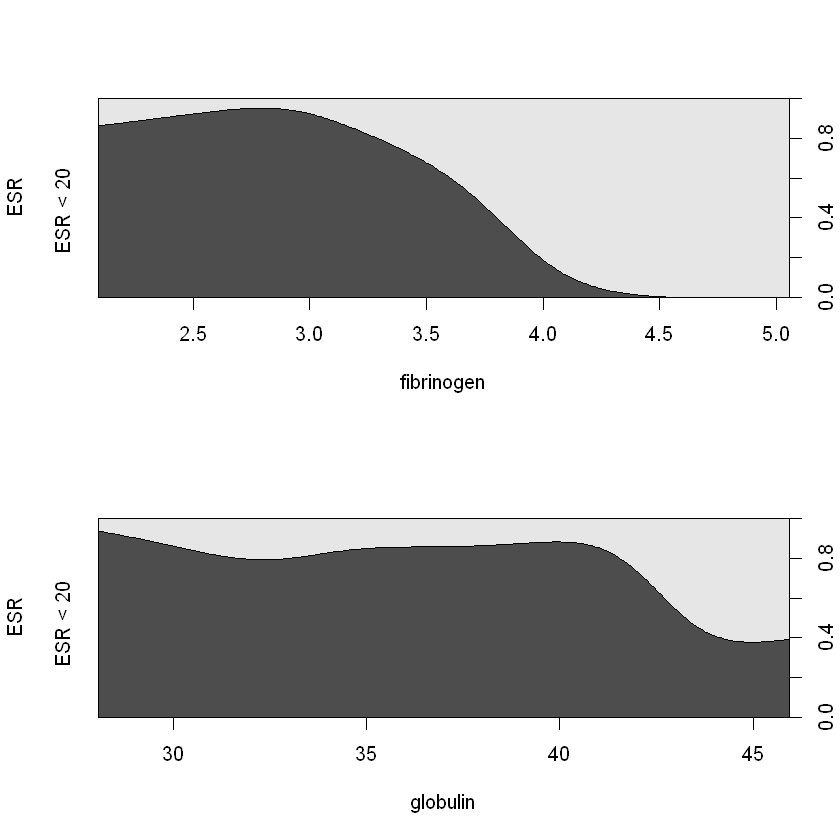

In [2]:
layout(matrix(1:2, nrow = 2)) 
cdplot(ESR ~ fibrinogen, data = plasma) 
cdplot(ESR ~ globulin, data = plasma)

The conditional density for each ESR category (smaller or larger than 20) is shown in a different shade, with the numerical value on the right hand vertical scale. Here, we can see that higher levels of each protein are associated with ESR values above 20, since the conditional probability for ESR bigger than 20 in both plots is larger as we move to the right of the plot horizontally (larger values of fibrinogen/gamma globulin).

Now, fit a logistic regression model to the data with the `glm` function, including only the single variable `fibrinogen`:

In [4]:
plasma.glm.1 <- glm(ESR ~ fibrinogen, data = plasma, family = binomial())

As is the case for the `lm` function, an intercept term is automatically included in the model. The `family` argument for `glm` specifies the distribution of the response - in this case, a binomial distribution. The default **link** function for the binomial family is **logistic**.

Apply the `summary` function to your fitted model to obtain a description of the fitting. Is the coefficient for `fibrinogen` significant at the 5% level? Interpret the meaning of this coefficient.

You can obtain a 95% confidence interval for the coefficient (make sure to read the help):

In [5]:
summary(plasma.glm.1)


Call:
glm(formula = ESR ~ fibrinogen, family = binomial(), data = plasma)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9298  -0.5399  -0.4382  -0.3356   2.4794  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -6.8451     2.7703  -2.471   0.0135 *
fibrinogen    1.8271     0.9009   2.028   0.0425 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 30.885  on 31  degrees of freedom
Residual deviance: 24.840  on 30  degrees of freedom
AIC: 28.84

Number of Fisher Scoring iterations: 5


In [8]:
confint(plasma.glm.1, parm = "(Intercept)") 

Waiting for profiling to be done...


2.5 %     97.5 % 
-13.656543  -2.327294

In [9]:
confint(plasma.glm.1, parm = "fibrinogen") 

Waiting for profiling to be done...


2.5 %    97.5 % 
0.3387619 3.9984921

Since these values correspond to the **log-odds**, we can get the **odds** by exponentiating the estimate (subsetting `coef` according to the value that we want; here it is for `fibrinogen` and not the intercept) and confidence interval:

In [10]:
exp(coef(plasma.glm.1)["fibrinogen"]) 
exp(confint(plasma.glm.1, parm = "fibrinogen"))

fibrinogen 
  6.215715

Waiting for profiling to be done...


2.5 %    97.5 % 
 1.403209 54.515884

In [11]:
exp(coef(plasma.glm.1)["(Intercept)"]) 
exp(confint(plasma.glm.1, parm = "(Intercept)"))

(Intercept) 
0.001064686

Waiting for profiling to be done...


2.5 %       97.5 % 
1.172299e-06 9.755943e-02

In [12]:
plasma.glm.2 <- glm(ESR ~ fibrinogen + globulin, data = plasma, family = binomial())

In [13]:
summary(plasma.glm.2)


Call:
glm(formula = ESR ~ fibrinogen + globulin, family = binomial(), 
    data = plasma)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9683  -0.6122  -0.3458  -0.2116   2.2636  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -12.7921     5.7963  -2.207   0.0273 *
fibrinogen    1.9104     0.9710   1.967   0.0491 *
globulin      0.1558     0.1195   1.303   0.1925  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 30.885  on 31  degrees of freedom
Residual deviance: 22.971  on 29  degrees of freedom
AIC: 28.971

Number of Fisher Scoring iterations: 5


You can perform a likelihood ratio (chi-square) test by subtracting the residual deviance of the second (bigger) model from that of the first (smaller) model, then comparing the result to a chi-square distribution with degrees of freedom equal to the difference in degrees of freedom between the two models:

In [14]:
anova(plasma.glm.1, plasma.glm.2, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
30,24.84036,NA,NA,NA
29,22.97111,1,1.869242,0.1715619


Here, we see that the `p`-value is large, meaning that we do **not** reject the null hypothesis that the coefficient for `globulin` is zero.

Even though we would not include `globulin` in our final model, for purposes of illustration we will use model 2 to obtain predicted values for each observation, then plot these against the values of **both** explanatory variables using the `symbols` to create a **bubbleplot**. The estimated conditional probability of an ESR value larger than 20 is obtained by:

In [15]:
prob <- predict(plasma.glm.2, type = "response")

and then assign a larger circle to observations with larger probability:

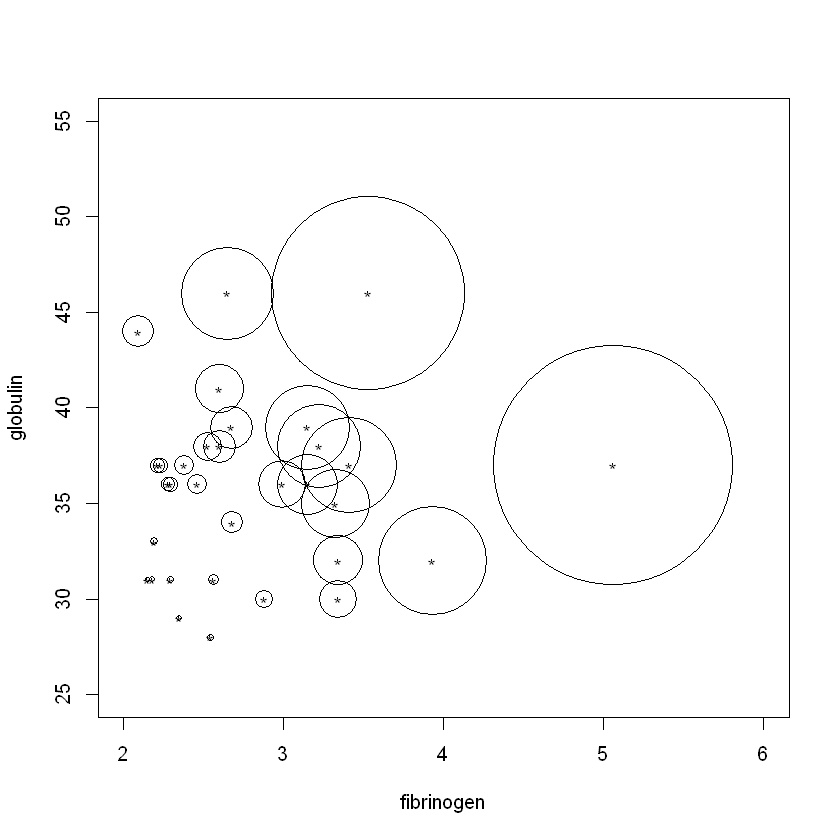

In [16]:
plot(globulin ~ fibrinogen, data = plasma, xlim = c(2,6), ylim = c(25,55), pch = "*") 
symbols(plasma$fibrinogen, plasma$globulin, circles = prob, add = TRUE)

This plot shows an increasing probability of ESR bigger than 20 (larger circles) with increasing fibrinogen and, to a lesser extent, with increasing gamma globulin.